# Definition

$$y(\mathbf{x}) = f\big(\mathbf{w}^T\phi(\mathbf{x})\big) \tag{4.52}$$
where 
- The nonlinear activation function $f(\cdot)$ is given by a *step function* of the form
$$f(a) = \left\{\begin{array}{ll} +1, & a\geqslant 0\\ -1, &a<0\end{array}\right. \tag{4.53}$$

- And typically, the vector (basis functions) $\phi(\mathbf{x})$ will include a bias component $\phi_0(\mathbf{x}) = 1$.
- It is more convinient to use target values $t=+1$ for class $C_1$ an $t=-1$ for class $C_2$.
- Our goal is to evaluate the values of the parameters that are denoted by $\mathbf{w}$. 

# Error functions
We note that we are seeking a weight vector $\mathbf{w}$ such that patterns $\mathbf{x}_n$ in class $C_1$ will have $\mathbf{w}^T\phi(\mathbf{x})>0$, whereas patterns $\mathbf{x}_n$ in class $C_2$ have $\mathbf{w}^T\phi(\mathbf{x}_n)<0$. Using the $t\in \{-1, +1\}$ target coding scheme it follows that we would like all patterns to satisfy $\mathbf{w}^T\phi(\mathbf{x}_n)t_n > 0$. And the patterns that is misclassified will give $\mathbf{w}^T\phi(\mathbf{x}_n)t_n < 0$. Then the error function is therefore given by

$$E_P(\mathbf{w}) = -\sum_{n\in\mathcal{M}}\mathbf{w}^T\phi_n t_n \tag{4.54}$$
where $\mathcal{M}$ denotes the set of all misclassified patterns. 

This error function is known as the *perceptron criterion*. Our goal is to adjust $\mathbf{w}$ in order to minimize this function.

# Find $\mathbf{w}$ to reduce error

We now apply the stochastic gradient descent algorithm (Section 3.1.3) to this error function. The change in the weight vector $\mathbf{w}$ is then given by

$$\mathbf{w}^{(\tau+1)}=\mathbf{w}^{(\tau)}-\eta\nabla E_P(\mathbf{w}) = \mathbf{w}^{(\tau)}+\eta \phi_n t_n \tag{4.55}$$

where
- $\tau$ is an integer that indexes the steps of the algorithm.
- $\eta$ is the learning rate. We set it equal to $1$ here.

The perceptron learning algorithm has a simple interpretation, as follow. <font color='Red'>For each pattern $\mathbf{x}_n$
1. Evaluate the perceptron function (4.52).
2. If the pattern is correctly classified, then the weight vector remains unchanged.
3. If the pattern is incorrectly classified, then we add $\phi(\mathbf{x}_n)t_n$ to $\mathbf{w}$.
4. If we have found parameters $\mathbf{w}$ to let all the patterns correctly classified, then stop.</font>

If we consider the effect of a single update in the perceptron learning algorithm, we see that the contribution to the error from the corresponding misclassified pattern will be reduced because from (4.55) we have

$$-\mathbf{w}^{(\tau+1)T}\phi_n t_n = -\mathbf{w}^{(\tau)T}\phi_n t_n-(\phi_n t_n)^T\phi_n t_n < -\mathbf{w}^{(\tau)T}\phi_n t_n \tag{4.56}$$

where we have set $\eta = 1$, and made use of $\|\phi_n t_n\|^2>0$.

<font color='Red'>Of course, this does not imply that the contribution to the error function from the other misclassified patterns will have been reduced. Furthermore, the change in weight vector may have caused some previously correctly classified patterns to become misclassified. Thus the perceptron learning rule is not guaranteed to reduce the total error function at each stage.</font>

# Difficulties

- If the training data set is linearly separable, then the perceptron learning algorithm is guaranteed to find a exact solution in a finited number of steps. But the number of steps required to achieved convergence could still be substantial, and in practice, until convergence is achieved, we will not be able to distinguish between a non separable problem and one that is simply slow to converge.
- One data set can have many solutions, and which one is found will depend on the initialization of the parameters and on the order of presentation of the data points.
- Furthermore, for data sets that are not linearly separable, the perceptron learning algorithm will never converge.

# Limitation
- Does not provide probabilistic outputs.
- Does not generalize readily to $K>2$ classes.
- It is based on linear combinations of fixed basis functions.

[ 1.9642936   0.41905306 -1.        ]


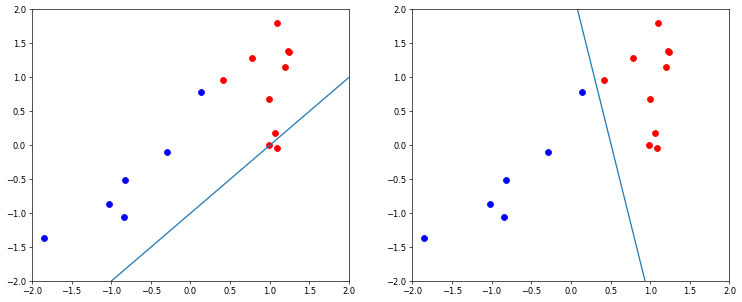

In [8]:
import numpy as np
import matplotlib.pyplot as plt

limX = [-2.0, 2.0]
limY = [-2.0, 2.0]

N=10
S1 = np.array([[0.1, 0.0],
               [0.0, 0.3]])
S2 = np.array([[0.4, 0.0],
               [0.0, 0.7]])
M1 = np.array([1, 1])
M2 = np.array([-1, -1])

Phi = lambda x: x

def gen_data(n):
    X1 = np.random.multivariate_normal(mean=M1, cov=S1, size=n)
    X2 = np.random.multivariate_normal(mean=M2, cov=S2, size=n)
    X = np.vstack((X1, X2))
    T1 = np.ones(X1.shape[0])
    T2 = -np.ones(X2.shape[0])
    T = np.hstack((T1, T2))
    
    # add w0
    X = np.c_[X, np.ones((X.shape[0], 1))]
    return X, T

def plot_points(ax, X, T):
    for i in range(len(X)):
        if T[i]==1:
            ax.scatter(X[i][0], X[i][1], s=50, color='red')
        elif T[i]==-1:
            ax.scatter(X[i][0], X[i][1], s=50, color='blue')
    
def perceptron(x, w, t):
    a = w @ Phi(x.T)
    if (a * t < 0):
        w = w + Phi(x.T).T * t
        changed = 1
    else:
        changed = 0
    return w, changed
    
def main():
    fig = plt.figure(figsize=(15,6), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim(limX[0], limX[1])
    ax1.set_ylim(limY[0], limY[1])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim(limX[0], limX[1])
    ax2.set_ylim(limY[0], limY[1])
    
    x = np.linspace(-2, 2, 10)
    X, T = gen_data(N)
    plot_points(ax1, X, T)
    
    w = np.array([-1.0, 1.0, 1.0])
    ax1.plot(x, -(w[0] * x + w[2])/w[1])
    
    i = 0
    correct_patterns = 0
    while correct_patterns < 2 * N:
        w, c = perceptron(X[i], w, T[i])
        if c==0:
            correct_patterns += 1
        else:
            correct_patterns = 0
        i = (i+1)%(2*N)

    print(w)
    plot_points(ax2, X, T)
    ax2.plot(x, -(w[0] * x + w[2])/w[1])
    plt.show()


if __name__ == "__main__":
    main()